# Exercise 2.9

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
%matplotlib inline

In [8]:
df = pd.read_csv('Datasets/Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [11]:
df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

In [18]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [21]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [22]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors = 'coerce')
df = df.fillna(df.median())

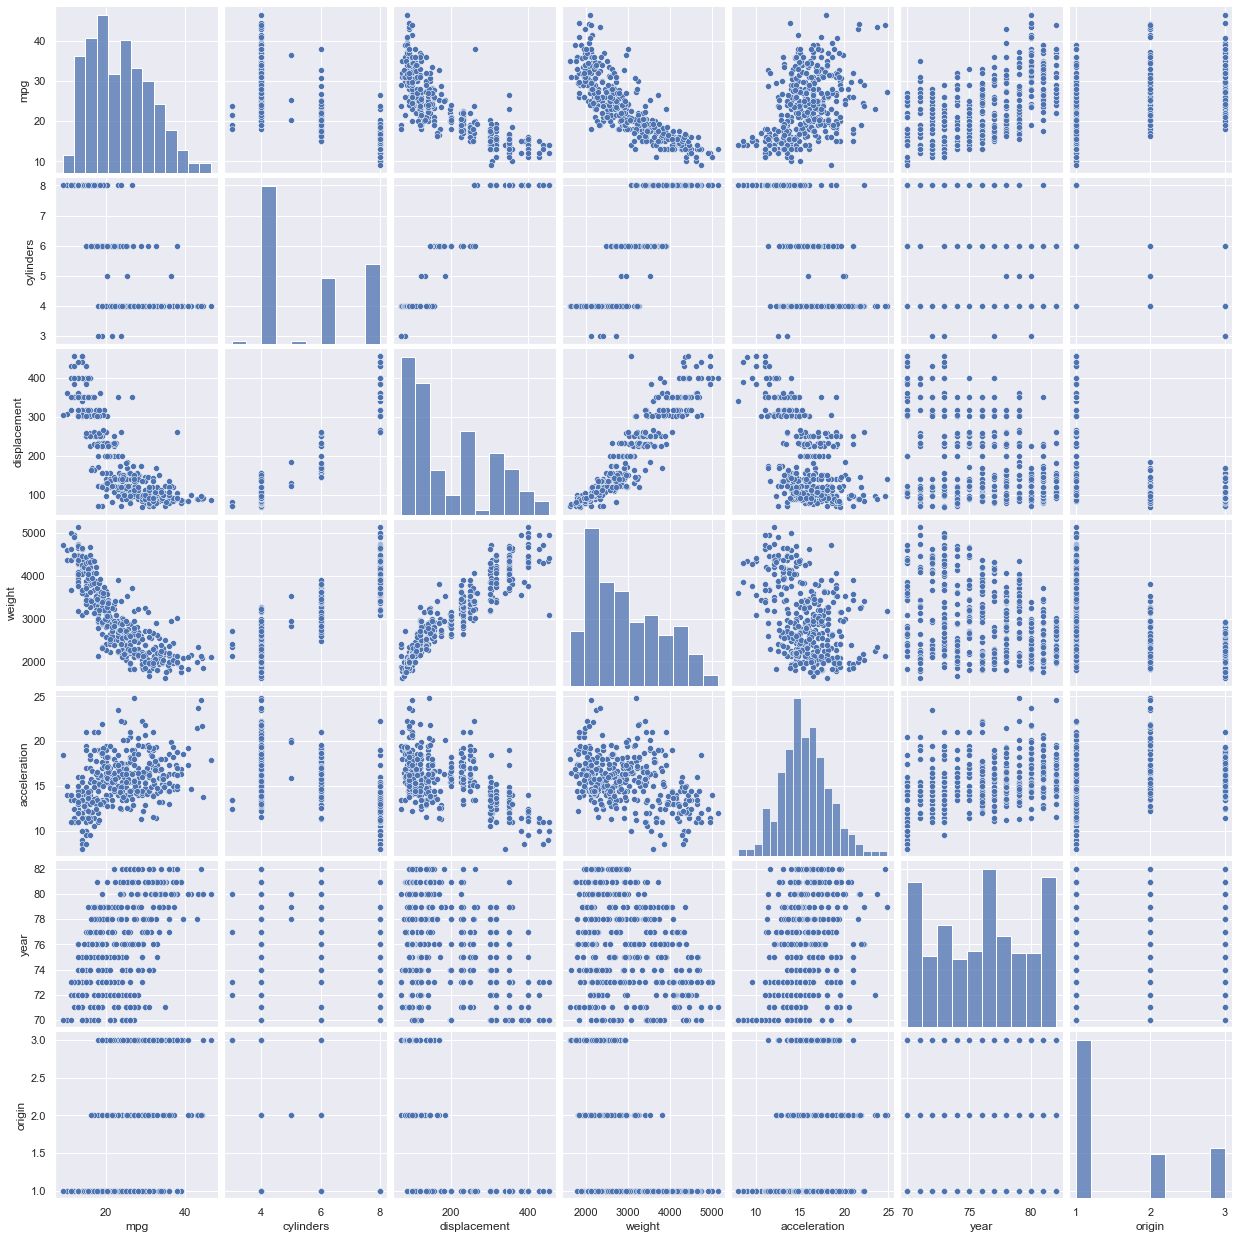

In [20]:
sns.pairplot(df)
plt.show()

# Exercise 3.8

In [25]:
import statsmodels.formula.api as smf

In [26]:
results = smf.ols('mpg ~ horsepower', data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     588.6
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           2.86e-80
Time:                        13:59:13   Log-Likelihood:                -1198.5
No. Observations:                 397   AIC:                             2401.
Df Residuals:                     395   BIC:                             2409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.0213      0.725     55.239      0.000      38.597      41.446
horsepower    -0.1582      0.007    -24.262      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       19.580   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.101
Skew:                           0.534   Prob(JB):                     2.62e-05
Kurtosis:                       3.369   Cond. No.                         323.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

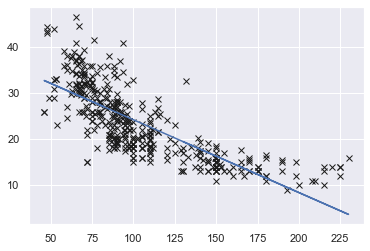

In [42]:
plt.plot(df['horsepower'], df['mpg'], 'kx')
plt.plot(df['horsepower'], results.fittedvalues)
plt.show()

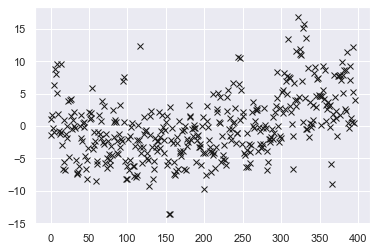

In [48]:
residue = df['mpg'] - results.fittedvalues
plt.plot(residue, 'kx')
plt.show()

# Exercise 3.9

In [50]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.773582,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.841536,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.895765,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.773582,0.841536,0.895765,1.000000,0.862590,-0.688167,-0.413992,-0.452943
weight,-0.831739,0.897017,0.933104,0.862590,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.688167,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.413992,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.452943,-0.581265,0.210084,0.184314,1.000000


In [53]:
results = smf.ols('mpg ~ horsepower + cylinders + weight + acceleration + year', 
                  data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     332.0
Date:                Mon, 11 Jan 2021   Prob (F-statistic):          2.96e-138
Time:                        15:19:52   Log-Likelihood:                -1050.7
No. Observations:                 397   AIC:                             2113.
Df Residuals:                     391   BIC:                             2137.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -16.2746      4.705     -3.459      0.001     -25.526      -7.023
horsepower       0.0073      0.013      0.557      0.578      -0.019       0.033
cylinders       -0.0703      0.245     -0.287      0.774      -0.552       0.411
weight          -0.0067      0.001    -11.333      0.000      -0.008      -0.006
acceleration     0.0969      0.100      0.971      0.332      -0.099       0.293
year             0.7600      0.052     14.598      0.000       0.658       0.862
==============================================================================
Omnibus:                       37.197   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.741
Skew:                           0.625   Prob(JB):                     2.90e-13
Kurtosis:                       4.389   Cond. No.                     8.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

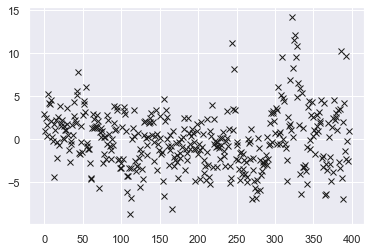

In [54]:
residue = df['mpg'] - results.fittedvalues
plt.plot(residue, 'kx')
plt.show()

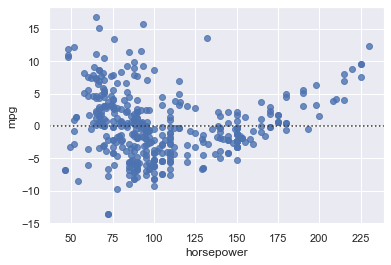

In [65]:
sns.residplot(y=df['mpg'], x=df['horsepower'])
plt.show()

# Exercise 4.11

# Exercise 7.8

# Exercise 9.7